In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


다운 받고 pretrained_models 폴더 만들고 그 안에 넣어주기 ( posenet-pytorch/pretrained_models)

In [ ]:
# !wget https://vision.in.tum.de/webarchive/hazirbas/poselstm-pytorch/places-googlenet.pickle

--2024-06-03 09:31:11--  https://vision.in.tum.de/webarchive/hazirbas/poselstm-pytorch/places-googlenet.pickle
Resolving vision.in.tum.de (vision.in.tum.de)... 131.159.19.110, 2a09:80c0:18::1110
Connecting to vision.in.tum.de (vision.in.tum.de)|131.159.19.110|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cvg.cit.tum.de/webarchive/hazirbas/poselstm-pytorch/places-googlenet.pickle [following]
--2024-06-03 09:31:12--  https://cvg.cit.tum.de/webarchive/hazirbas/poselstm-pytorch/places-googlenet.pickle
Resolving cvg.cit.tum.de (cvg.cit.tum.de)... 131.159.19.110, 2a09:80c0:18::1110
Connecting to cvg.cit.tum.de (cvg.cit.tum.de)|131.159.19.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124794267 (119M)
Saving to: ‘places-googlenet.pickle’

places-googlenet.pi 100%[===================>] 119.01M  23.2MB/s    in 6.3s    

2024-06-03 09:31:19 (19.0 MB/s) - ‘places-googlenet.pickle’ saved [124794267/124794267]



# 1. Dataset

1-1 이미지 파일 업로드 , 압축풀기

In [ ]:
import zipfile
import os
import shutil

# 압축 파일 경로와 해제할 디렉토리 경로 설정
zip_paths = [
   "/content/drive/MyDrive/team1/team1.zip",
    # "/content/drive/MyDrive/딥러닝/PoseNet/public.zip"
]
extract_path = "/content/drive/MyDrive/team1/datasets/Renaissance4F"
temp_extract_path = "/content/drive/MyDrive/team1/datasets/temp_Renaissance4F"

# 최종 디렉토리가 존재하지 않으면 생성
if not os.path.exists(extract_path):
    os.makedirs(extract_path)

# 두 개의 zip 파일을 순차적으로 처리
for zip_path in zip_paths:
    # 임시 디렉토리가 존재하지 않으면 생성
    if not os.path.exists(temp_extract_path):
        os.makedirs(temp_extract_path)

    # 압축 파일 해제
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(temp_extract_path)

    # 임시 폴더에서 모든 파일을 최상위 폴더로 이동
    for root, dirs, files in os.walk(temp_extract_path):
        for file in files:
            # 파일을 최상위 디렉토리로 이동
            shutil.move(os.path.join(root, file), os.path.join(extract_path, file))

    # 임시 폴더 삭제
    shutil.rmtree(temp_extract_path)



In [ ]:
import zipfile
import os
import shutil

# 압축 파일 경로와 해제할 디렉토리 경로 설정
zip_paths = [
   "/content/drive/MyDrive/sim_data_color.zip"
    # "/content/drive/MyDrive/딥러닝/PoseNet/public.zip"
]
extract_path = "/content/drive/MyDrive/team1/datasets_test/Renaissance4F"
temp_extract_path = "/content/drive/MyDrive/team1/datasets_test/temp_Renaissance4F"

# 최종 디렉토리가 존재하지 않으면 생성
if not os.path.exists(extract_path):
    os.makedirs(extract_path)

# 두 개의 zip 파일을 순차적으로 처리
for zip_path in zip_paths:
    # 임시 디렉토리가 존재하지 않으면 생성
    if not os.path.exists(temp_extract_path):
        os.makedirs(temp_extract_path)

    # 압축 파일 해제
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(temp_extract_path)

    # 임시 폴더에서 모든 파일을 최상위 폴더로 이동
    for root, dirs, files in os.walk(temp_extract_path):
        for file in files:
            # 파일을 최상위 디렉토리로 이동
            shutil.move(os.path.join(root, file), os.path.join(extract_path, file))

    # 임시 폴더 삭제
    shutil.rmtree(temp_extract_path)


In [ ]:
import os

# 이미지 파일 확장자 리스트
image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff']

# 이미지 파일 수를 세는 함수
def count_image_files(directory):
    count = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                count += 1
    return count

# 경로 설정
directory_path = "/content/drive/MyDrive/team1/datasets/Renaissance4F"

# 이미지 파일 수 확인
image_count = count_image_files(directory_path)
print(f"Number of image files in {directory_path}: {image_count}")


Number of image files in /content/drive/MyDrive/team1/datasets/Renaissance4F: 2552


In [ ]:
import os

# 이미지 파일 확장자 리스트
image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff']

# 이미지 파일 수를 세는 함수
def count_image_files(directory):
    count = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                count += 1
    return count

# 경로 설정
directory_path = "/content/drive/MyDrive/team1/datasets_test/Renaissance4F"

# 이미지 파일 수 확인
image_count = count_image_files(directory_path)
print(f"Number of image files in {directory_path}: {image_count}")


Number of image files in /content/drive/MyDrive/team1/datasets_test/Renaissance4F: 1094


1-2 우리가 만든 dataset과 교수님이 만든 dataset, test dataset 이미지 크기 확인 및 크기 맞추기

In [ ]:
from PIL import Image
# 우리가 만든 dataset
# 이미지 파일 경로
image_path = '/content/drive/MyDrive/team1/datasets/Renaissance4F/frame000001.png'

# 이미지를 불러옴
image = Image.open(image_path)

# 이미지의 크기와 컬러 채널 정보를 출력
print('이미지 크기:', image.size)

이미지 크기: (1280, 720)


In [ ]:
from PIL import Image
# 교수님이 만든 dataset
# 이미지 파일 경로
image_path = '/content/drive/MyDrive/team1/datasets/Renaissance4F/prame001080.png'
# 이미지를 불러옴
image = Image.open(image_path)

# 이미지의 크기와 컬러 채널 정보를 출력
print('이미지 크기:', image.size)

이미지 크기: (1920, 1088)


In [ ]:
from PIL import Image
# testdataset
# 이미지 파일 경로
image_path = "/content/drive/MyDrive/team1/datasets_test/Renaissance4F/frame000074.png"
# 이미지를 불러옴
image = Image.open(image_path)

# 이미지의 크기와 컬러 채널 정보를 출력
print('이미지 크기:', image.size)

이미지 크기: (1920, 1088)


In [ ]:
from PIL import Image
import os

# 폴더 경로 설정
folder_path = '/content/drive/MyDrive/team1/datasets_test/Renaissance4F'

# 폴더 내의 모든 파일을 순회
for filename in os.listdir(folder_path):
    # 파일 이름이 'p'로 시작하면
    if filename.startswith('f'):
        file_path = os.path.join(folder_path, filename)

        # 이미지를 열기
        with Image.open(file_path) as img:
            # 이미지 크기가 (1920, 1088)인 경우에만 크기 조정
            if img.size == (1920, 1088):
                # 이미지 크기를 (1280, 720)으로 변경
                resized_img = img.resize((1280, 720))

                # 같은 이름으로 이미지 저장
                resized_img.save(file_path)

# 확인해보기
image_path = "/content/drive/MyDrive/team1/datasets_test/Renaissance4F/frame000074.png"
# 이미지를 불러옴
image = Image.open(image_path)

# 이미지의 크기와 컬러 채널 정보를 출력
print('이미지 크기:', image.size)

이미지 크기: (1280, 720)


1-3 train csv( label ) 파일 확인

In [ ]:
import pandas as pd

# CSV 파일 경로 설정
file_path = "/content/drive/MyDrive/team1/team1_transformed_data.csv"

# 데이터프레임 로드
train_df = pd.read_csv(file_path)

# 데이터프레임 셔플
test_df = train_df.sample(frac=1).reset_index(drop=True)

# 셔플된 데이터프레임을 확인
print(f"총 데이터 개수: {len(train_df)}")
print(train_df.head())

총 데이터 개수: 1277
             #name         x         y         z    heading      pitch  \
0  frame000001.png  7.108520 -4.497005 -0.534644  79.191701  81.934743   
1  frame000002.png  7.114794 -4.474541 -0.530424  78.740388  82.033606   
2  frame000003.png  7.064528 -4.419114 -0.520214  80.502148  81.843839   
3  frame000004.png  7.011300 -4.295620 -0.502352  79.084856  82.314556   
4  frame000005.png  6.937386 -4.207511 -0.496863  80.260850  82.480704   

        roll  
0  74.172669  
1  73.743495  
2  75.566202  
3  73.957533  
4  74.992733  


1-4 train csv( label ) 파일 확인

In [ ]:
import pandas as pd

# CSV 파일 경로 설정
file_path = "/content/drive/MyDrive/rene4_cpu_int_ext_rpy.csv"

# 데이터프레임 로드
test_df = pd.read_csv(file_path)

# 'Unnamed' 열 제거
test_df = test_df.loc[:, ~test_df.columns.str.contains('^Unnamed')]

# 데이터프레임 셔플
test_df = test_df.sample(frac=1).reset_index(drop=True)

# 수정된 데이터프레임을 새 CSV 파일로 저장
new_file_path = "/content/drive/MyDrive/rene4_cpu_int_ext_rpy_cleaned.csv"
test_df.to_csv(new_file_path, index=False)

# 셔플된 데이터프레임을 확인
print(f"총 데이터 개수: {len(test_df)}")
print(test_df.head())



총 데이터 개수: 949
             #name         x          y         z     heading      pitch  \
0  frame000682.png  7.816202  31.848473  1.153021 -145.780999  76.747191   
1  frame000526.png  6.305285  -0.452898  1.293351  -11.462176  78.852357   
2  frame000165.png  6.265218  24.980678  1.066787 -147.856292  82.126131   
3  frame001083.png  4.746870  -5.035392  1.389128   18.091044  84.128513   
4  frame000505.png  4.044376  -3.335920  1.264216   11.072112  83.837787   

        roll  
0  18.154251  
1  23.152706  
2  29.020755  
3  35.243860  
4   9.658300  


1-5  heading, pitch, roll→ P ,W, Q , R

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial.transform import Rotation as R

# 각 데이터셋에 대해 변환 적용 함수
def process_data(df):
    # 위치 벡터 P 구하기
    P = df[['x', 'y', 'z']].values

    # 회전 행렬 R 구하기
    def euler_to_rotation_matrix(heading, pitch, roll):
        r = R.from_euler('zyx', [heading, pitch, roll], degrees=True)
        return r.as_matrix()

    R_matrices = np.array([euler_to_rotation_matrix(h, p, r) for h, p, r in zip(df['heading'], df['pitch'], df['roll'])])

    # 변환 행렬 W 구하기
    W = np.zeros((len(df), 4, 4))
    W[:, :3, :3] = R_matrices
    W[:, :3, 3] = P
    W[:, 3, 3] = 1

    # 퀘터니언 Q 구하기
    Q = np.array([R.from_matrix(r).as_quat() for r in R_matrices])

    # 결과 DataFrame으로 만들기
    result_df = pd.DataFrame({
        'ImageFile': df['#name'],
        'X': df['x'],
        'Y': df['y'],
        'Z': df['z'],
        'W': Q[:, 0],
        'P': Q[:, 1],
        'Q': Q[:, 2],
        'R': Q[:, 3]
    })

    return result_df

# train 데이터셋 처리
result_train_df = process_data(train_df)
output_file_path_train = '/content/drive/MyDrive/team1/datasets/Renaissance4F/dataset_train.txt'
result_train_df.to_csv(output_file_path_train, sep=' ', index=False, header=False)

# test 데이터셋 처리
result_test_df = process_data(test_df)
output_file_path_test = '/content/drive/MyDrive/team1/datasets_test/Renaissance4F/dataset_test.txt'
result_test_df.to_csv(output_file_path_test, sep=' ', index=False, header=False)

# 결과 출력
print("Train 데이터셋 예시:")
print(result_train_df.head())

print("\nTest 데이터셋 예시:")
print(result_test_df.head())


Train 데이터셋 예시:
         ImageFile         X         Y         Z         W         P  \
0  frame000001.png  7.108520 -4.497005 -0.534644  0.684210  0.112801   
1  frame000002.png  7.114794 -4.474541 -0.530424  0.683019  0.118688   
2  frame000003.png  7.064528 -4.419114 -0.520214  0.687826  0.095992   
3  frame000004.png  7.011300 -4.295620 -0.502352  0.683965  0.117105   
4  frame000005.png  6.937386 -4.207511 -0.496863  0.687065  0.104875   

          Q         R  
0  0.688564  0.212160  
1  0.687301  0.216831  
2  0.692156  0.196472  
3  0.688204  0.211787  
4  0.691327  0.197509  

Test 데이터셋 예시:
         ImageFile         X          Y         Z         W         P  \
0  frame000682.png  7.816202  31.848473  1.153021  0.549495 -0.298557   
1  frame000526.png  6.305285  -0.452898  1.293351  0.092105  0.634534   
2  frame000165.png  6.265218  24.980678  1.066787  0.558781 -0.357586   
3  frame001083.png  4.746870  -5.035392  1.389128  0.322342  0.595250   
4  frame000505.png  4.044376

1-6 이미지 파일을 로드하고 크기를 조정하며 평균 이미지를 계산하여 npy 파일로 저장

In [ ]:
import numpy as np
from os.path import join as jpath
from PIL import Image
import os

# 설정 변수
dataroot = '/content/drive/MyDrive/team1/datasets/Renaissance4F'
height = 256
width = 455
save_resized_imgs = True  # True로 설정하여 크기 조정된 이미지를 저장

# 이미지 크기 설정
imsize = [height, width]  # (H, W)

# # train 이미지 목록 로드
# imlist = np.loadtxt(jpath(dataroot, 'dataset_train.txt'), dtype=str, delimiter=' ', skiprows=3, usecols=(0))

# # 평균 이미지 계산
# mean_image = np.zeros((imsize[0], imsize[1], 3), dtype=np.float64)
# for i, impath in enumerate(imlist):
#     print(f'[{i+1}/{len(imlist)}]: {impath}', end='\r')
#     image = Image.open(jpath(dataroot, impath)).convert('RGB')
#     image = image.resize((imsize[1], imsize[0]), Image.BICUBIC)
#     mean_image += np.array(image).astype(np.float64)

#     # 크기 조정된 training 이미지 저장
#     if save_resized_imgs:
#         resized_path = jpath(dataroot, 'resized_train')
#         os.makedirs(resized_path, exist_ok=True)
#         image.save(jpath(resized_path, impath))

# print()
# mean_image /= len(imlist)
# Image.fromarray(mean_image.astype(np.uint8)).save(jpath(dataroot, 'mean_image.png'))
# np.save(jpath(dataroot, 'mean_image.npy'), mean_image)

# 크기 조정된 test 이미지 저장
# 설정 변수
dataroot = '/content/drive/MyDrive/team1/datasets_test/Renaissance4F'
height = 256
width = 455
save_resized_imgs = True  # True로 설정하여 크기 조정된 이미지를 저장

if save_resized_imgs:
    imlist = np.loadtxt(jpath(dataroot, 'dataset_test.txt'), dtype=str, delimiter=' ', skiprows=3, usecols=(0))
    for i, impath in enumerate(imlist):
        print(f'[{i+1}/{len(imlist)}]: {impath}', end='\r')
        image = Image.open(jpath(dataroot, impath)).convert('RGB')
        image = image.resize((imsize[1], imsize[0]), Image.BICUBIC)
        resized_path = jpath(dataroot, 'resized_test')
        os.makedirs(resized_path, exist_ok=True)
        image.save(jpath(resized_path, impath))
    print()

[946/946]: frame000428.png


# 2 DataLoad 및 Architecture 정의

## 2-1 DataLoader

In [ ]:
# best_data_loader.py
class BaseDataLoader():
    def __init__(self):
        pass

    def initialize(self, opt):
        self.opt = opt
        pass

    def load_data():
        return None

In [ ]:
#base_dataset.py
import torch.utils.data as data
from PIL import Image
import torchvision.transforms as transforms
import numpy
import torch

class BaseDataset(data.Dataset):
    def __init__(self):
        super(BaseDataset, self).__init__()

    def name(self):
        return 'BaseDataset'

    def initialize(self, opt):
        pass

def get_transform(opt):
    transform_list = []
    if opt.resize_or_crop == 'resize_and_crop':
        osize = [opt.loadSize, opt.loadSize]
        transform_list.append(transforms.Scale(osize, Image.BICUBIC))
        transform_list.append(transforms.RandomCrop(opt.fineSize))
    elif opt.resize_or_crop == 'crop':
        transform_list.append(transforms.RandomCrop(opt.fineSize))
    elif opt.resize_or_crop == 'scale_width':
        transform_list.append(transforms.Lambda(
            lambda img: __scale_width(img, opt.fineSize)))
    elif opt.resize_or_crop == 'scale_width_and_crop':
        transform_list.append(transforms.Resize(opt.loadSize, Image.BICUBIC))
        # transform_list.append(transforms.Lambda(
        #     lambda img: __scale_width(img, opt.loadSize)))
        if opt.isTrain:
            transform_list.append(transforms.RandomCrop(opt.fineSize))
        else:
            transform_list.append(transforms.CenterCrop(opt.fineSize))

    if opt.isTrain and not opt.no_flip:
        transform_list.append(transforms.RandomHorizontalFlip())

    transform_list += [transforms.ToTensor(),
                       transforms.Normalize((0.5, 0.5, 0.5),
                                            (0.5, 0.5, 0.5))]
    return transforms.Compose(transform_list)

def get_posenet_transform(opt, mean_image):
    transform_list = []
    transform_list.append(transforms.Resize(opt.loadSize, Image.BICUBIC))
    transform_list.append(transforms.Lambda(
        lambda img: __subtract_mean(img, mean_image)))
    transform_list.append(transforms.Lambda(
        lambda img: __crop_image(img, opt.fineSize, opt.isTrain)))
    transform_list.append(transforms.Lambda(
        lambda img: __to_tensor(img)))
    return transforms.Compose(transform_list)

def __scale_width(img, target_width):
    ow, oh = img.size
    if (ow == target_width):
        return img
    w = target_width
    h = int(target_width * oh / ow)
    return img.resize((w, h), Image.BICUBIC)

# __subtract_mean 함수 수정
def __subtract_mean(img, mean_image):
    # 입력 이미지와 mean_image의 크기 맞추기
    img = img.resize((mean_image.shape[1], mean_image.shape[0]))
    return np.array(img).astype('float') - mean_image.astype('float')

def __crop_image(img, size, isTrain):
    h, w = img.shape[0:2]
    # w, h = img.size
    if isTrain:
        if w == size and h == size:
            return img
        x = numpy.random.randint(0, w - size)
        y = numpy.random.randint(0, h - size)
    else:
        x = int(round((w - size) / 2.))
        y = int(round((h - size) / 2.))
    return img[y:y+size, x:x+size, :]
    # return img.crop((x, y, x + size, y + size))

def __to_tensor(img):
    return torch.from_numpy(img.transpose((2, 0, 1)))

In [ ]:
#image_folder.py
import torch.utils.data as data

from PIL import Image
import os
import os.path

IMG_EXTENSIONS = [
    '.jpg', '.JPG', '.jpeg', '.JPEG',
    '.png', '.PNG', '.ppm', '.PPM', '.bmp', '.BMP',
]


def is_image_file(filename):
    return any(filename.endswith(extension) for extension in IMG_EXTENSIONS)


def make_dataset(dir):
    images = []
    assert os.path.isdir(dir), '%s is not a valid directory' % dir

    for root, _, fnames in sorted(os.walk(dir)):
        for fname in fnames:
            if is_image_file(fname):
                path = os.path.join(root, fname)
                images.append(path)

    return sorted(images)


def default_loader(path):
    return Image.open(path).convert('RGB')


class ImageFolder(data.Dataset):

    def __init__(self, root, transform=None, return_paths=False,
                 loader=default_loader):
        imgs = make_dataset(root)
        if len(imgs) == 0:
            raise(RuntimeError("Found 0 images in: " + root + "\n"
                               "Supported image extensions are: " +
                               ",".join(IMG_EXTENSIONS)))

        self.root = root
        self.imgs = imgs
        self.transform = transform
        self.return_paths = return_paths
        self.loader = loader

    def __getitem__(self, index):
        path = self.imgs[index]
        img = self.loader(path)
        if self.transform is not None:
            img = self.transform(img)
        if self.return_paths:
            return img, path
        else:
            return img

    def __len__(self):
        return len(self.imgs)

In [ ]:
#unaligned_posenet_dataset.py
import torchvision.transforms as transforms
#from data.base_dataset import BaseDataset, get_posenet_transform
#from data.image_folder import make_dataset
from PIL import Image
import PIL
import random
import numpy

class UnalignedPoseNetDataset(BaseDataset):
    def initialize(self, opt):
        self.opt = opt
        self.root = opt.dataroot

        split_file = os.path.join(self.root , 'dataset_'+opt.phase+'.txt')
        self.A_paths = numpy.loadtxt(split_file, dtype=str, delimiter=' ', skiprows=3, usecols=(0))
        self.A_paths = [os.path.join(self.root, path) for path in self.A_paths]
        self.A_poses = numpy.loadtxt(split_file, dtype=float, delimiter=' ', skiprows=3, usecols=(1,2,3,4,5,6,7))
        self.mean_image = numpy.load(os.path.join(self.root , 'mean_image.npy'))
        if opt.model == "poselstm":
            self.mean_image = None
            print("mean image subtraction is deactivated")

        self.A_size = len(self.A_paths)
        self.transform = get_posenet_transform(opt, self.mean_image)

    def __getitem__(self, index):
        A_path = self.A_paths[index % self.A_size]
        index_A = index % self.A_size
        # print('(A, B) = (%d, %d)' % (index_A, index_B))
        A_img = Image.open(A_path).convert('RGB')
        A_pose = self.A_poses[index % self.A_size]

        A = self.transform(A_img)

        return {'A': A, 'B': A_pose,
                'A_paths': A_path}

    def __len__(self):
        return self.A_size

    def name(self):
        return 'UnalignedPoseNetDataset'

In [ ]:
#custom_dataset_data_loader.py
import torch.utils.data
# from data.base_data_loader import BaseDataLoader


def CreateDataset(opt):
    dataset = None
    if opt.dataset_mode == 'unaligned_posenet':
        # from data.unaligned_posenet_dataset import UnalignedPoseNetDataset
        dataset = UnalignedPoseNetDataset()
    else:
        raise ValueError("Dataset [%s] not recognized." % opt.dataset_mode)

    print("dataset [%s] was created" % (dataset.name()))
    dataset.initialize(opt)
    return dataset


class CustomDatasetDataLoader(BaseDataLoader):
    def name(self):
        return 'CustomDatasetDataLoader'

    def initialize(self, opt):
        BaseDataLoader.initialize(self, opt)
        self.dataset = CreateDataset(opt)

        def init_fn(worker_id):
            torch.manual_seed(opt.seed)

        self.dataloader = torch.utils.data.DataLoader(
            self.dataset,
            batch_size=opt.batchSize,
            shuffle=not opt.serial_batches,
            num_workers=int(opt.nThreads),
            worker_init_fn=init_fn)

    def load_data(self):
        return self

    def __len__(self):
        return min(len(self.dataset), self.opt.max_dataset_size)

    def __iter__(self):
        for i, data in enumerate(self.dataloader):
            if i >= self.opt.max_dataset_size:
                break
            yield data

In [ ]:
# data_loader.py
def CreateDataLoader(opt):
    # from data.custom_dataset_data_loader import CustomDatasetDataLoader
    data_loader = CustomDatasetDataLoader()
    print(data_loader.name())
    data_loader.initialize(opt)
    return data_loader

# 2-2. Architecture

In [ ]:
from __future__ import print_function
import torch
import numpy as np
from PIL import Image
import inspect, re
import os
import collections
import argparse
import torch.nn.functional as F
from collections import OrderedDict
from torch.autograd import Variable
import pickle
import numpy
import sys
import numpy
import random
from PIL import Image
import PIL
import random
import numpy
import torch.utils.data as data
import torchvision.transforms as transforms


In [ ]:
# Converts a Tensor into a Numpy array
# |imtype|: the desired type of the converted numpy array
def tensor2im(image_tensor, imtype=np.uint8):
    image_numpy = image_tensor[0].cpu().float().numpy()
    if image_numpy.shape[0] == 1:
        image_numpy = np.tile(image_numpy, (3, 1, 1))
    image_numpy = (np.transpose(image_numpy, (1, 2, 0)) + 1) / 2.0 * 255.0
    return image_numpy.astype(imtype)


def diagnose_network(net, name='network'):
    mean = 0.0
    count = 0
    for param in net.parameters():
        if param.grad is not None:
            mean += torch.mean(torch.abs(param.grad.data))
            count += 1
    if count > 0:
        mean = mean / count
    print(name)
    print(mean)


def save_image(image_numpy, image_path):
    image_pil = Image.fromarray(image_numpy)
    image_pil.save(image_path)

def info(object, spacing=10, collapse=1):
    """Print methods and doc strings.
    Takes module, class, list, dictionary, or string."""
    methodList = [e for e in dir(object) if isinstance(getattr(object, e), collections.Callable)]
    processFunc = collapse and (lambda s: " ".join(s.split())) or (lambda s: s)
    print( "\n".join(["%s %s" %
                     (method.ljust(spacing),
                      processFunc(str(getattr(object, method).__doc__)))
                     for method in methodList]) )

def varname(p):
    for line in inspect.getframeinfo(inspect.currentframe().f_back)[3]:
        m = re.search(r'\bvarname\s*\(\s*([A-Za-z_][A-Za-z0-9_]*)\s*\)', line)
        if m:
            return m.group(1)

def print_numpy(x, val=True, shp=False):
    x = x.astype(np.float64)
    if shp:
        print('shape,', x.shape)
    if val:
        x = x.flatten()
        print('mean = %3.3f, min = %3.3f, max = %3.3f, median = %3.3f, std=%3.3f' % (
            np.mean(x), np.min(x), np.max(x), np.median(x), np.std(x)))


def mkdirs(paths):
    if isinstance(paths, list) and not isinstance(paths, str):
        for path in paths:
            mkdir(path)
    else:
        mkdir(paths)


def mkdir(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [ ]:
# 필요한 라이브러리 임포트
import argparse
import os
import torch
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from torch.utils.data import random_split
from torch.utils.data import Subset, DataLoader, random_split
# BaseOptions 클래스 정의
class BaseOptions():
    def __init__(self):
        self.parser = argparse.ArgumentParser(formatter_class=argparse.ArgumentDefaultsHelpFormatter)
        self.initialized = False

    def initialize(self):
        self.parser.add_argument('--dataroot', required=True, help='이미지 경로 (trainA, trainB, valA, valB 등의 하위 폴더가 있어야 합니다)')
        self.parser.add_argument('--batchSize', type=int, default=75, help='입력 배치 크기')
        self.parser.add_argument('--loadSize', type=int, default=256, help='이미지를 이 크기로 스케일링')
        self.parser.add_argument('--fineSize', type=int, default=224, help='그 후 이 크기로 자르기')
        self.parser.add_argument('--input_nc', type=int, default=3, help='입력 이미지 채널 수')
        self.parser.add_argument('--output_nc', type=int, default=7, help='출력 이미지 채널 수')
        self.parser.add_argument('--lstm_hidden_size', type=int, default=256, help='PoseLSTM의 LSTM 레이어 숨김 크기')
        self.parser.add_argument('--gpu_ids', type=str, default='0', help='GPU ID: e.g. 0  0,1,2, 0,2. CPU를 사용하려면 -1')
        self.parser.add_argument('--name', type=str, default='experiment_name', help='실험 이름. 샘플 및 모델을 저장할 위치를 결정')
        self.parser.add_argument('--dataset_mode', type=str, default='unaligned_posenet', help='데이터셋 로드 방식을 선택. [unaligned | aligned | single]')
        self.parser.add_argument('--model', type=str, default='posenet', help='사용할 모델을 선택. [posenet | poselstm]')
        self.parser.add_argument('--nThreads', default=8, type=int, help='데이터 로드 스레드 수')
        self.parser.add_argument('--checkpoints_dir', type=str, default='./checkpoints', help='모델이 저장되는 위치')
        self.parser.add_argument('--serial_batches', action='store_true', help='true이면 순서대로 배치 생성, 그렇지 않으면 무작위로 생성')
        self.parser.add_argument('--display_winsize', type=int, default=224, help='디스플레이 창 크기')
        self.parser.add_argument('--display_id', type=int, default=0, help='웹 디스플레이 창 ID')
        self.parser.add_argument('--display_port', type=int, default=8097, help='웹 디스플레이의 visdom 포트')
        self.parser.add_argument('--no_dropout', action='store_true', help='생성기에서 드롭아웃을 사용하지 않음')
        self.parser.add_argument('--max_dataset_size', type=int, default=999999999, help='데이터셋당 허용되는 최대 샘플 수')
        self.parser.add_argument('--resize_or_crop', type=str, default='scale_width_and_crop', help='이미지 로드 시 스케일링 및 크롭 방식 [resize_and_crop|crop|scale_width|scale_width_and_crop]')
        self.parser.add_argument('--no_flip', action='store_true', default=True, help='지정된 경우, 데이터 증강을 위해 이미지를 뒤집지 않음')
        self.parser.add_argument('--seed', type=int, default=0, help='결정적인 결과를 위한 초기 랜덤 시드')
        self.parser.add_argument('--beta', type=float, default=500, help='posenet에서 사용되는 베타 계수')

        self.initialized = True

    def parse(self):
        if not self.initialized:
            self.initialize()
        # 기본 값을 코드에서 직접 제공
        args = [
            '--dataroot', '/content/drive/MyDrive/team1/datasets/Renaissance4F',
            '--batchSize', '64',
            '--loadSize', '256',
            '--fineSize', '224',
            '--input_nc', '3',
            '--output_nc', '7',
            '--lstm_hidden_size', '256',
            '--gpu_ids', '0',
            '--name', '/content/drive/MyDrive/team1/PoseNetresnet_final/beta100',
            '--dataset_mode', 'unaligned_posenet',
            '--model', 'posenet',
            '--nThreads', '8',
            '--checkpoints_dir', '/content/drive/MyDrive/team1/PoseNetresnet_final/checkpoints',
            '--display_winsize', '224',
            '--display_port', '8097',
            '--max_dataset_size', '999999999',
            '--resize_or_crop', 'scale_width_and_crop',
            '--seed', '0',
            '--beta', '50',
            '--display_freq', '100',
            '--update_html_freq', '1000',
            '--print_freq', '100',
            '--save_latest_freq', '5000',
            '--save_epoch_freq', '10', # 10으로 조정
            '--epoch_count', '1',
            '--niter', '200', # epoch 조정
            '--niter_decay', '0',
            '--adambeta1', '0.9',
            '--adambeta2', '0.999',
            '--lr', '0.0005',
            '--pool_size', '50',
            '--lr_policy', 'lambda',
            '--lr_decay_iters', '50',
            '--init_weights', '/content/drive/MyDrive/team1/places-googlenet.pickle'
        ]
        self.opt = self.parser.parse_args(args)
        self.opt.isTrain = self.isTrain   # train or test

        str_ids = self.opt.gpu_ids.split(',')
        self.opt.gpu_ids = []
        for str_id in str_ids:
            id = int(str_id)
            if id >= 0:
                self.opt.gpu_ids.append(id)

        # set gpu ids
        if len(self.opt.gpu_ids) > 0:
            torch.cuda.set_device(self.opt.gpu_ids[0])

        args = vars(self.opt)

        print('------------ Options -------------')
        for k, v in sorted(args.items()):
            print('%s: %s' % (str(k), str(v)))
        print('-------------- End ----------------')

        # save to the disk
        expr_dir = os.path.join(self.opt.checkpoints_dir, self.opt.name)
        mkdirs(expr_dir)
        file_name = os.path.join(expr_dir, 'opt_'+self.opt.phase+'.txt')
        with open(file_name, 'wt') as opt_file:
            opt_file.write('------------ Options -------------\n')
            for k, v in sorted(args.items()):
                opt_file.write('%s: %s\n' % (str(k), str(v)))
            opt_file.write('-------------- End ----------------\n')
        return self.opt

# Define the TrainOptions class
class TrainOptions(BaseOptions):
    def initialize(self):
        BaseOptions.initialize(self)
        self.parser.add_argument('--display_freq', type=int, default=100, help='frequency of showing training results on screen')
        self.parser.add_argument('--display_single_pane_ncols', type=int, default=0, help='if positive, display all images in a single visdom web panel with certain number of images per row.')
        self.parser.add_argument('--update_html_freq', type=int, default=1000, help='frequency of saving training results to html')
        self.parser.add_argument('--print_freq', type=int, default=100, help='frequency of showing training results on console')
        self.parser.add_argument('--save_latest_freq', type=int, default=5000, help='frequency of saving the latest results')
        self.parser.add_argument('--save_epoch_freq', type=int, default=5, help='frequency of saving checkpoints at the end of epochs')
        self.parser.add_argument('--continue_train', action='store_true', help='continue training: load the latest model')
        self.parser.add_argument('--epoch_count', type=int, default=1, help='the starting epoch count, we save the model by <epoch_count>, <epoch_count>+<save_latest_freq>, ...')
        self.parser.add_argument('--phase', type=str, default='train', help='train, val, test, etc')
        self.parser.add_argument('--which_epoch', type=str, default='latest', help='which epoch to load? set to latest to use latest cached model')
        self.parser.add_argument('--niter', type=int, default=500, help='# of iter at starting learning rate')
        self.parser.add_argument('--niter_decay', type=int, default=0, help='# of iter to linearly decay learning rate to zero')
        self.parser.add_argument('--adambeta1', type=float, default=0.9, help='first momentum term of adam')
        self.parser.add_argument('--adambeta2', type=float, default=0.999, help='second momentum term of adam')
        self.parser.add_argument('--lr', type=float, default=0.0005, help='initial learning rate for adam')
        self.parser.add_argument('--pool_size', type=int, default=50, help='the size of image buffer that stores previously generated images')
        self.parser.add_argument('--use_html', action='store_true', help='save intermediate training results to [opt.checkpoints_dir]/[opt.name]/web/')
        self.parser.add_argument('--lr_policy', type=str, default='lambda', help='learning rate policy: lambda|step|plateau')
        self.parser.add_argument('--lr_decay_iters', type=int, default=50, help='multiply by a gamma every lr_decay_iters iterations')
        self.parser.add_argument('--init_weights', type=str, default='/content/drive/MyDrive/team1/places-googlenet.pickle', help='initiliaze network from, e.g., /content/drive/MyDrive/딥러닝/PoseNet/places-googlenet.pickle')

        self.isTrain = True


opt = TrainOptions().parse()

------------ Options -------------
adambeta1: 0.9
adambeta2: 0.999
batchSize: 64
beta: 50.0
checkpoints_dir: /content/drive/MyDrive/team1/PoseNetresnet_final/checkpoints
continue_train: False
dataroot: /content/drive/MyDrive/team1/datasets/Renaissance4F
dataset_mode: unaligned_posenet
display_freq: 100
display_id: 0
display_port: 8097
display_single_pane_ncols: 0
display_winsize: 224
epoch_count: 1
fineSize: 224
gpu_ids: [0]
init_weights: /content/drive/MyDrive/team1/places-googlenet.pickle
input_nc: 3
isTrain: True
loadSize: 256
lr: 0.0005
lr_decay_iters: 50
lr_policy: lambda
lstm_hidden_size: 256
max_dataset_size: 999999999
model: posenet
nThreads: 8
name: /content/drive/MyDrive/team1/PoseNetresnet_final/beta100
niter: 200
niter_decay: 0
no_dropout: False
no_flip: True
output_nc: 7
phase: train
pool_size: 50
print_freq: 100
resize_or_crop: scale_width_and_crop
save_epoch_freq: 10
save_latest_freq: 5000
seed: 0
serial_batches: False
update_html_freq: 1000
use_html: False
which_epoch: 

###  모델 불러오기

In [ ]:
class BaseModel():
    def name(self):
        return 'BaseModel'

    def initialize(self, opt):
        self.opt = opt
        self.gpu_ids = opt.gpu_ids
        self.isTrain = opt.isTrain
        self.Tensor = torch.cuda.FloatTensor if self.gpu_ids else torch.Tensor
        self.save_dir = os.path.join(opt.checkpoints_dir, opt.name)

    def set_input(self, input):
        self.input = input

    def forward(self):
        pass

    # used in test time, no backprop
    def test(self):
        pass

    def get_image_paths(self):
        pass

    def optimize_parameters(self):
        pass

    def get_current_visuals(self):
        return self.input

    def get_current_errors(self):
        return {}

    def save(self, label):
        pass

    # helper saving function that can be used by subclasses
    def save_network(self, network, network_label, epoch_label, gpu_ids):
        save_filename = '%s_net_%s.pth' % (epoch_label, network_label)
        save_path = os.path.join(self.save_dir, save_filename)
        torch.save(network.cpu().state_dict(), save_path)
        if len(gpu_ids) and torch.cuda.is_available():
            network.cuda(gpu_ids[0])

    # helper loading function that can be used by subclasses
    def load_network(self, network, network_label, epoch_label):
        save_filename = '%s_net_%s.pth' % (epoch_label, network_label)
        save_path = os.path.join(self.save_dir, save_filename)
        network.load_state_dict(torch.load(save_path))

    # update learning rate (called once every epoch)
    def update_learning_rate(self):
        for scheduler in self.schedulers:
            scheduler.step()
        lr = self.optimizers[0].param_groups[0]['lr']
        print('learning rate = %.7f' % lr)

### network

In [ ]:
import torch
import torch.nn as nn
from torch.nn import init
from torch.nn import functional as F
import functools
from torch.autograd import Variable
from torch.optim import lr_scheduler
import numpy as np
###############################################################################

def get_scheduler(optimizer, opt):
    if opt.lr_policy == 'lambda':
        def lambda_rule(epoch):
            lr_l = 1.0 - max(0, epoch + 1 + opt.epoch_count - opt.niter) / float(opt.niter_decay + 1)
            return lr_l
        scheduler = lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda_rule)
    elif opt.lr_policy == 'step':
        scheduler = lr_scheduler.StepLR(optimizer, step_size=opt.lr_decay_iters, gamma=0.1)
    elif opt.lr_policy == 'plateau':
        scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.2, threshold=0.01, patience=5)
    else:
        return NotImplementedError('learning rate policy [%s] is not implemented', opt.lr_policy)
    return scheduler


def define_network(input_nc, lstm_hidden_size, model, init_from=None, isTest=False, gpu_ids=[]):
    netG = None
    use_gpu = len(gpu_ids) > 0

    if use_gpu:
        assert(torch.cuda.is_available())

    if model == 'posenet':
        netG = ResNetPoseNet(input_nc, weights=init_from, isTest=isTest, gpu_ids=gpu_ids)
    else:
        raise NotImplementedError('Model name [%s] is not recognized' % model)
    if len(gpu_ids) > 0:
        netG.cuda(gpu_ids[0])
    return netG

### visualize

In [ ]:
!pip install visdom
!pip install dominate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408195 sha256=74e916eb6df6ef6497c2a892224a27b7da57b91390ac4ac6dbcb7a2e66daf844
  Stored in directory: /root/.cache/pip/wheels/42/29/49/5bed207bac4578e4d2c0c5fc0226bfd33a7e2953ea56356855
Successfully built visdom


In [ ]:
import ntpath
import time

import dominate
from dominate.tags import *
import os

######################## html

class HTML:
    def __init__(self, web_dir, title, reflesh=0):
        self.title = title
        self.web_dir = web_dir
        self.img_dir = os.path.join(self.web_dir, 'images')
        if not os.path.exists(self.web_dir):
            os.makedirs(self.web_dir)
        if not os.path.exists(self.img_dir):
            os.makedirs(self.img_dir)
        # print(self.img_dir)

        self.doc = dominate.document(title=title)
        if reflesh > 0:
            with self.doc.head:
                meta(http_equiv="reflesh", content=str(reflesh))

    def get_image_dir(self):
        return self.img_dir

    def add_header(self, str):
        with self.doc:
            h3(str)

    def add_table(self, border=1):
        self.t = table(border=border, style="table-layout: fixed;")
        self.doc.add(self.t)

    def add_images(self, ims, txts, links, width=400):
        self.add_table()
        with self.t:
            with tr():
                for im, txt, link in zip(ims, txts, links):
                    with td(style="word-wrap: break-word;", halign="center", valign="top"):
                        with p():
                            with a(href=os.path.join('images', link)):
                                img(style="width:%dpx" % width, src=os.path.join('images', im))
                            br()
                            p(txt)

    def save(self):
        html_file = '%s/index.html' % self.web_dir
        f = open(html_file, 'wt')
        f.write(self.doc.render())
        f.close()


if __name__ == '__main__':
    html = HTML('web/', 'test_html')
    html.add_header('hello world')

    ims = []
    txts = []
    links = []
    for n in range(4):
        ims.append('image_%d.png' % n)
        txts.append('text_%d' % n)
        links.append('image_%d.png' % n)
    html.add_images(ims, txts, links)
    html.save()

##################################

class Visualizer():
    def __init__(self, opt):
        self.display_id = opt.display_id
        self.use_html = opt.isTrain and opt.use_html
        self.win_size = opt.display_winsize
        self.name = opt.name
        self.opt = opt
        self.saved = False
        if self.display_id > 0:
            import visdom
            self.vis = visdom.Visdom(port=opt.display_port)

        if self.use_html:
            self.web_dir = os.path.join(opt.checkpoints_dir, opt.name, 'web')
            self.img_dir = os.path.join(self.web_dir, 'images')
            print('create web directory %s...' % self.web_dir)
            mkdirs([self.web_dir, self.img_dir])
        if opt.isTrain:
          ###########################################################
            self.log_name = os.path.join(opt.checkpoints_dir, opt.name, 'loss_log.txt')
            #self.log_name = '/content/drive/MyDrive/딥러닝 기말프로젝트/posenet-pytorch/checkpoints/experiment_name/loss_log.txt'
            ############################################################3
            with open(self.log_name, "w") as log_file:
                now = time.strftime("%c")
                log_file.write('================ Training Loss (%s) ================\n' % now)
        else:
            self.log_name = os.path.join(opt.results_dir, opt.name, '%s_%s.txt' % (opt.phase, opt.which_epoch))
            with open(self.log_name, "w") as log_file:
                log_file.close()

    def reset(self):
        self.saved = False

    # |visuals|: dictionary of images to display or save
    def display_current_results(self, visuals, epoch, save_result):
        if self.display_id > 0:  # show images in the browser
            ncols = self.opt.display_single_pane_ncols
            if ncols > 0:
                h, w = next(iter(visuals.values())).shape[:2]
                table_css = """<style>
                        table {border-collapse: separate; border-spacing:4px; white-space:nowrap; text-align:center}
                        table td {width: %dpx; height: %dpx; padding: 4px; outline: 4px solid black}
                        </style>""" % (w, h)
                title = self.name
                label_html = ''
                label_html_row = ''
                nrows = int(np.ceil(len(visuals.items()) / ncols))
                images = []
                idx = 0
                for label, image_numpy in visuals.items():
                    label_html_row += '<td>%s</td>' % label
                    images.append(image_numpy.transpose([2, 0, 1]))
                    idx += 1
                    if idx % ncols == 0:
                        label_html += '<tr>%s</tr>' % label_html_row
                        label_html_row = ''
                white_image = np.ones_like(image_numpy.transpose([2, 0, 1]))*255
                while idx % ncols != 0:
                    images.append(white_image)
                    label_html_row += '<td></td>'
                    idx += 1
                if label_html_row != '':
                    label_html += '<tr>%s</tr>' % label_html_row
                # pane col = image row
                self.vis.images(images, nrow=ncols, win=self.display_id + 1,
                                padding=2, opts=dict(title=title + ' images'))
                label_html = '<table>%s</table>' % label_html
                self.vis.text(table_css + label_html, win=self.display_id + 2,
                              opts=dict(title=title + ' labels'))
            else:
                idx = 1
                for label, image_numpy in visuals.items():
                    self.vis.image(image_numpy.transpose([2, 0, 1]), opts=dict(title=label),
                                   win=self.display_id + idx)
                    idx += 1

        if self.use_html and (save_result or not self.saved):  # save images to a html file
            self.saved = True
            for label, image_numpy in visuals.items():
                img_path = os.path.join(self.img_dir, 'epoch%.3d_%s.png' % (epoch, label))
                save_image(image_numpy, img_path)
            # update website
            webpage = html.HTML(self.web_dir, 'Experiment name = %s' % self.name, reflesh=1)
            for n in range(epoch, 0, -1):
                webpage.add_header('epoch [%d]' % n)
                ims = []
                txts = []
                links = []

                for label, image_numpy in visuals.items():
                    img_path = 'epoch%.3d_%s.png' % (n, label)
                    ims.append(img_path)
                    txts.append(label)
                    links.append(img_path)
                webpage.add_images(ims, txts, links, width=self.win_size)
            webpage.save()

    # errors: dictionary of error labels and values
    def plot_current_errors(self, epoch, counter_ratio, opt, errors):
        if not hasattr(self, 'plot_data'):
            self.plot_data = {'X': [], 'Y': [], 'legend': list(errors.keys())}
        self.plot_data['X'].append(epoch + counter_ratio)
        self.plot_data['Y'].append([errors[k] for k in self.plot_data['legend']])
        self.vis.line(
            X=np.stack([np.array(self.plot_data['X'])] * len(self.plot_data['legend']), 1),
            Y=np.array(self.plot_data['Y']),
            opts={
                'title': self.name + ' loss over time',
                'legend': self.plot_data['legend'],
                'xlabel': 'epoch',
                'ylabel': 'loss'},
            win=self.display_id)

    # errors: same format as |errors| of plotCurrentErrors
    def print_current_errors(self, epoch, i, errors, t):
        message = '(epoch: %d, iters: %d, time: %.3f) ' % (epoch, i, t)
        for k, v in errors.items():
            message += '%s: %.3f ' % (k, v)

        print(message)
        with open(self.log_name, "a") as log_file:
            log_file.write('%s\n' % message)

    def print_loss_values(self, epoch, iteration, loss_G, loss_pos, loss_ori, time_elapsed):
        message = f'(epoch: {epoch}, iter: {iteration}, time: {time_elapsed:.3f}) '
        message += f'loss_G: {loss_G:.3f}, loss_pos: {loss_pos:.3f}, loss_ori: {loss_ori:.3f}'
        print(message)


    # save image to the disk
    def save_images(self, webpage, visuals, image_path):
        image_dir = webpage.get_image_dir()
        short_path = ntpath.basename(image_path[0])
        name = os.path.splitext(short_path)[0]

        webpage.add_header(name)
        ims = []
        txts = []
        links = []

        for label, image_numpy in visuals.items():
            image_name = '%s_%s.png' % (name, label)
            save_path = os.path.join(image_dir, image_name)
            save_image(image_numpy, save_path)

            ims.append(image_name)
            txts.append(label)
            links.append(image_name)
        webpage.add_images(ims, txts, links, width=self.win_size)

    def change_log_path(self, which_epoch):
        self.log_name = os.path.join(self.opt.results_dir,
                                     self.opt.name,
                                     '%s_%s.txt' % (self.opt.phase, which_epoch))

    def save_estimated_pose(self, image_path, pose):
        with open(self.log_name, "a") as log_file:
            pose_str = ''.join('%.6f ' % p for p in pose)
            log_file.write('%s %s\n' % (image_path, pose_str))


##  resnet 50 ( 이미 다운 받아서 다시 안 받아도 됨)

In [ ]:
from torchvision.models import resnet18,resnet50
from torchvision import models
import torch
import torch.nn as nn

In [ ]:
# 사전에 저장된 ResNet-50 모델 가중치 가져오기
model_path = '/content/drive/MyDrive/team1/modified_ResNet50Model.pth'
resnet50_model = resnet50(weights=None)  # weights=None으로 설정하여 가중치를 나중에 불러오도록 설정

# DataParallel로 저장된 가중치 로드
state_dict = torch.load(model_path)
# "module." 접두사 제거
new_state_dict = {}
for k, v in state_dict.items():
    if k.startswith('module.'):
        new_state_dict[k[7:]] = v
    else:
        new_state_dict[k] = v

# 모델의 fc 레이어 크기 수정
num_ftrs = resnet50_model.fc.in_features
resnet50_model.fc = nn.Linear(num_ftrs, 365)  # 가중치 파일의 클래스 수로 변경

resnet50_model.load_state_dict(new_state_dict)  # 수정된 가중치 로드

<All keys matched successfully>

### 여기는 돌려야됨 ( resnet50 to resnet18 )

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

from torchvision.models import resnet18
resnet1_8= resnet18(weights=None)


resnet1_8.layer1[0].conv1.weight= resnet50_model.layer1[0].conv2.weight
resnet1_8.layer1[0].bn1.weight= resnet50_model.layer1[0].bn1.weight
resnet1_8.layer1[0].conv2.weight= resnet50_model.layer1[0].conv2.weight
resnet1_8.layer1[0].bn2.weight= resnet50_model.layer1[0].bn1.weight

resnet1_8.layer1[1].conv1.weight= resnet50_model.layer1[1].conv2.weight
resnet1_8.layer1[1].bn1.weight= resnet50_model.layer1[1].bn1.weight
resnet1_8.layer1[1].conv2.weight= resnet50_model.layer1[2].conv2.weight
resnet1_8.layer1[1].bn2.weight= resnet50_model.layer1[2].bn1.weight


resnet1_8.layer2[0].bn1.weight= resnet50_model.layer2[0].bn1.weight
resnet1_8.layer2[0].conv2.weight= resnet50_model.layer2[0].conv2.weight
resnet1_8.layer2[0].bn2.weight= resnet50_model.layer2[0].bn1.weight

resnet1_8.layer2[1].conv1.weight= resnet50_model.layer2[2].conv2.weight
resnet1_8.layer2[1].bn1.weight= resnet50_model.layer2[2].bn1.weight
resnet1_8.layer2[1].conv2.weight= resnet50_model.layer2[3].conv2.weight
resnet1_8.layer2[1].bn2.weight= resnet50_model.layer2[3].bn1.weight


resnet1_8.layer3[0].bn1.weight= resnet50_model.layer3[0].bn1.weight
resnet1_8.layer3[0].conv2.weight= resnet50_model.layer3[0].conv2.weight
resnet1_8.layer3[0].bn2.weight= resnet50_model.layer3[0].bn1.weight

resnet1_8.layer3[1].conv1.weight= resnet50_model.layer3[3].conv2.weight
resnet1_8.layer3[1].bn1.weight= resnet50_model.layer3[3].bn1.weight
resnet1_8.layer3[1].conv2.weight= resnet50_model.layer3[5].conv2.weight
resnet1_8.layer3[1].bn2.weight= resnet50_model.layer3[5].bn1.weight


resnet1_8.layer4[0].bn1.weight= resnet50_model.layer4[0].bn1.weight
resnet1_8.layer4[0].conv2.weight= resnet50_model.layer4[0].conv2.weight
resnet1_8.layer4[0].bn2.weight= resnet50_model.layer4[0].bn1.weight

resnet1_8.layer4[1].conv1.weight= resnet50_model.layer4[1].conv2.weight
resnet1_8.layer4[1].bn1.weight= resnet50_model.layer4[1].bn1.weight
resnet1_8.layer4[1].conv2.weight= resnet50_model.layer4[2].conv2.weight
resnet1_8.layer4[1].bn2.weight= resnet50_model.layer4[2].bn1.weight

# 커스텀 ResNet 모델 생성
finalresnet50to18 = resnet1_8

##  resnet50to18 to posnet

In [ ]:
import torch
import torch.nn as nn
from torch.nn import init
from torch.nn import functional as F
import functools
from torch.autograd import Variable
from torch.optim import lr_scheduler
import numpy as np

In [ ]:
# 새로운 클래스 정의
class ModifiedResNet(nn.Module):
    def __init__(self, original_model):
        super(ModifiedResNet, self).__init__()
        self.features = nn.Sequential(*list(original_model.children())[:-2])  # 마지막 fc 레이어 이전까지 포함
        #self.avgpool = original_model.avgpool  # AdaptiveAvgPool2d 레이어 포함

    def forward(self, x):
        x = self.features(x)
        #x = self.avgpool(x)
        return x



def weight_init_resnet(key, module, weights=None):
    #if weights is None:
    #    init.constant_(module.bias.data, 0.0)
    #    if key == "XYZ":
    #        init.normal_(module.weight.data, 0.0, 0.5)
    #    else:
    #        init.normal_(module.weight.data, 0.0, 0.01)
    return module

# defines the regression heads for googlenet
class ResNetRegressionHead(nn.Module):
    def __init__(self):
        super(ResNetRegressionHead, self).__init__()
        dropout_rate = 0.7
        nc_cls = 512 # resnet 이 [75,512,7,7] 이라서 바꿈
        self.dropout = nn.Dropout(p=dropout_rate)
        self.projection = nn.AvgPool2d(kernel_size=7, stride=1) # [75,512,7,7]  -> [75,512,1,1]
        self.cls_fc_pose = nn.Sequential(*[weight_init_resnet("pose", nn.Linear(512, 512)), # [75,512]-> [75,512]
                                               nn.ReLU(inplace=True)])
        self.cls_fc_xy = weight_init_resnet("XYZ", nn.Linear(512, 3)) # [75,3] # nc_cls[1] -> 512로 수정
        self.cls_fc_wpqr = weight_init_resnet("WPQR", nn.Linear(512, 4)) # [75,4]

    def forward(self, input):
        output = self.projection(input)
        output = self.cls_fc_pose(output.view(output.size(0), -1))
        output = self.dropout(output)
        output_xy = self.cls_fc_xy(output)
        output_wpqr = self.cls_fc_wpqr(output)
        output_wpqr = F.normalize(output_wpqr, p=2, dim=1)
        return [output_xy, output_wpqr]


class ResNetPoseNet(nn.Module):
    def __init__(self,  isTest=False,  gpu_ids=[]):
        super(ResNetPoseNet, self).__init__()
        self.gpu_ids = gpu_ids
        self.isTest = isTest
        ################################################## finalresnet50to18에서 -2개 layer 빼고 가져오기
        self.resnet = ModifiedResNet(finalresnet50to18)

        ################################################## PoseNet을 위해 수정된 부분
        self.cls1_fc = ResNetRegressionHead()

        ################################################## PoseNet에서는 GoogleNet의 Inception Blocks 사용하면서, 회귀 헤드를 포함한 전체네트워크를 구성
        self.model = nn.Sequential(*[self.resnet,self.cls1_fc
                                   ])
        if self.isTest:
            self.model.eval() # ensure Dropout is deactivated during test

    def forward(self, input):
        output_resnet = self.resnet(input)
        return self.cls1_fc(output_resnet)


# 3. Train

In [ ]:
# 필요한 라이브러리 임포트
import argparse
import os
import torch
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from torch.utils.data import random_split
from torch.utils.data import Subset, DataLoader, random_split

In [ ]:
## SEEDING
torch.manual_seed(opt.seed)
np.random.seed(opt.seed)
random.seed(opt.seed)
torch.backends.cudnn.deterministic = True



# 데이터 로더 생성
data_loader = CreateDataLoader(opt)
dataset = data_loader.dataset  # 실제 데이터셋 객체를 가져옴
dataset_size = len(dataset)
print('#ttotal images = %d' % dataset_size)

# 데이터셋을 8:2 비율로 나누기
train_size = int(0.8 * dataset_size)
val_size = dataset_size - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('#training samples = %d' % train_size)
print('#validation samples = %d' % val_size)

# DataLoader 생성
train_loader = DataLoader(train_dataset, batch_size=opt.batchSize, shuffle=True, num_workers=opt.nThreads)
val_loader = DataLoader(val_dataset, batch_size=opt.batchSize, shuffle=False, num_workers=opt.nThreads)



CustomDatasetDataLoader
dataset [UnalignedPoseNetDataset] was created
#ttotal images = 1274
#training samples = 1019
#validation samples = 255


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
resnet_netG = None
gpu_ids= [0]
isTrain = opt.isTrain

use_gpu = len(gpu_ids) > 0
if use_gpu:
        assert(torch.cuda.is_available())

resnet_netG = ResNetPoseNet( isTest=not isTrain, gpu_ids=gpu_ids)
if len(gpu_ids) > 0:
        resnet_netG.cuda(gpu_ids[0])

googlenet_weights = None
old_lr = opt.lr
Tensor = torch.cuda.FloatTensor if gpu_ids else torch.Tensor
save_dir = os.path.join(opt.checkpoints_dir, opt.name)


if not isTrain or opt.continue_train:
    BaseModel.load_network(resnet_netG, 'G', opt.which_epoch)

if isTrain:
    old_lr = opt.lr
    # define loss functions
    criterion = torch.nn.MSELoss()

    # initialize optimizers
    schedulers = []
    optimizers = []
    optimizer_G = torch.optim.Adam(resnet_netG.parameters(),lr=opt.lr, eps=1,weight_decay=0.0625,betas=(opt.adambeta1, opt.adambeta2))
    optimizers.append(optimizer_G)


visualizer = Visualizer(opt)

In [ ]:
total_steps = 0

def save_network( network, network_label, epoch_label, gpu_ids):
        save_filename = '%s_net_%s.pth' % (epoch_label, network_label)
        save_path = os.path.join(save_dir, save_filename)
        torch.save(network.cpu().state_dict(), save_path)
        if len(gpu_ids) and torch.cuda.is_available():
            network.cuda(gpu_ids[0])

def get_current_errors():
        if opt.isTrain:
            return OrderedDict([('pos_err', loss_pos),
                                ('ori_err', loss_ori),
                                ])

        pos_err = torch.dist(pred_B[0], input_B[:, 0:3])
        ori_gt = F.normalize(input_B[:, 3:], p=2, dim=1)
        abs_distance = torch.abs((ori_gt.mul(pred_B[1])).sum())
        ori_err = 2*180/numpy.pi* torch.acos(abs_distance)
        return [pos_err.item(), ori_err.item()]

In [ ]:
def save_network(network, network_label, epoch_label, gpu_ids):
        save_filename = '%s_net_%s.pth' % (epoch_label, network_label)
        save_path = os.path.join(save_dir, save_filename)
        torch.save(network.cpu().state_dict(), save_path)
        if len(gpu_ids) and torch.cuda.is_available():
            network.cuda(gpu_ids[0])


# 학습 중 에러와 학습률을 기록할 리스트 초기화
position_errors = []
orientation_errors = []
learning_rates = []
val_position_errors = []
val_orientation_errors = []

for epoch in range(opt.epoch_count, opt.niter + opt.niter_decay + 1):
    epoch_start_time = time.time()
    epoch_iter = 0
    epoch_position_errors = []
    epoch_orientation_errors = []

    for i, data in enumerate(train_loader):
        iter_start_time = time.time()
        visualizer.reset()
        total_steps += opt.batchSize
        epoch_iter += opt.batchSize

        # 사용할 데이터
        input_A = data['A']
        input_B = data['B']
        image_paths = data['A_paths']
        input_A.resize_(input_A.size()).copy_(input_A)
        input_B.resize_(input_B.size()).copy_(input_B)
        input_A = input_A.float().cuda()
        input_B = input_B.float().cuda()


        # resnet backbone model
        pred_B = resnet_netG(input_A)

        optimizer_G.zero_grad()

        loss_G = 0
        loss_pos = 0
        loss_ori = 0


        mse_pos = criterion(pred_B[0], input_B[:, 0:3]) # l은 0,1,2
        ori_gt = F.normalize(input_B[:, 3:], p=2, dim=1)
        mse_ori = criterion(pred_B[1], ori_gt)
        loss_G += (mse_pos + mse_ori * opt.beta)
        loss_pos += mse_pos.item()
        loss_ori += mse_ori.item()  * opt.beta
        loss_G.backward()

        optimizer_G.step()

        errors = get_current_errors()
        position_error = errors['pos_err']
        orientation_error = errors['ori_err']
        epoch_position_errors.append(position_error)
        epoch_orientation_errors.append(orientation_error)

        if total_steps % opt.print_freq == 0:
            errors = get_current_errors()
            t = (time.time() - iter_start_time) / opt.batchSize
            visualizer.print_current_errors(epoch, epoch_iter, errors, t)

            if opt.display_id > 0:
                visualizer.plot_current_errors(epoch, float(epoch_iter)/dataset_size, opt, errors)

    ######################## valid 검증하기
    val_epoch_position_errors = []
    val_epoch_orientation_errors = []
    with torch.no_grad():
        for i, data in enumerate(val_loader):
          input_A = data['A']
          input_B = data['B']
          image_paths = data['A_paths']
          input_A.resize_(input_A.size()).copy_(input_A)
          input_B.resize_(input_B.size()).copy_(input_B)
          input_A = input_A.float().cuda()
          input_B = input_B.float().cuda()


          # resnet backbone model
          pred_B = resnet_netG(input_A) #model.forward()
          errors = get_current_errors()
          position_error = errors['pos_err']
          orientation_error = errors['ori_err']
          val_epoch_position_errors.append(position_error)
          val_epoch_orientation_errors.append(orientation_error)

    avg_position_error = np.mean(epoch_position_errors)
    avg_orientation_error = np.mean(epoch_orientation_errors)
    avg_val_position_error = np.mean(val_epoch_position_errors)
    avg_val_orientation_error = np.mean(val_epoch_orientation_errors)
    position_errors.append(avg_position_error)
    orientation_errors.append(avg_orientation_error)
    val_position_errors.append(avg_val_position_error)
    val_orientation_errors.append(avg_val_orientation_error)
    current_lr = optimizers[0].param_groups[0]['lr']
    learning_rates.append(current_lr)

    print('Training Position Error: %.4f, Training Orientation Error: %.4f' % (avg_position_error, avg_orientation_error))
    print('Validation Position Error: %.4f, Validation Orientation Error: %.4f' % (avg_val_position_error, avg_val_orientation_error))




    if epoch % opt.save_epoch_freq == 0:
      save_network(resnet_netG,'latest',epoch,gpu_ids)
    print('End of epoch %d / %d \t Time Taken: %d sec' % (epoch, opt.niter + opt.niter_decay, time.time() - epoch_start_time))

    for scheduler in schedulers:
            scheduler.step()
    lr = optimizers[0].param_groups[0]['lr']
    print('learning rate = %.7f' % lr)

Training Position Error: 113.3841, Training Orientation Error: 10.7420
Validation Position Error: 81.0280, Validation Orientation Error: 11.5219
End of epoch 1 / 200 	 Time Taken: 58 sec
learning rate = 0.0005000
(epoch: 2, iters: 576, time: 0.005) pos_err: 83.962 ori_err: 7.246 
Training Position Error: 81.3041, Training Orientation Error: 9.2042
Validation Position Error: 46.8462, Validation Orientation Error: 9.7562
End of epoch 2 / 200 	 Time Taken: 46 sec
learning rate = 0.0005000
Training Position Error: 45.6964, Training Orientation Error: 8.7344
Validation Position Error: 36.2263, Validation Orientation Error: 6.5288
End of epoch 3 / 200 	 Time Taken: 47 sec
learning rate = 0.0005000
(epoch: 4, iters: 128, time: 0.010) pos_err: 29.116 ori_err: 9.014 
Training Position Error: 28.5612, Training Orientation Error: 8.6457
Validation Position Error: 22.8579, Validation Orientation Error: 8.6417
End of epoch 4 / 200 	 Time Taken: 43 sec
learning rate = 0.0005000
(epoch: 5, iters: 704

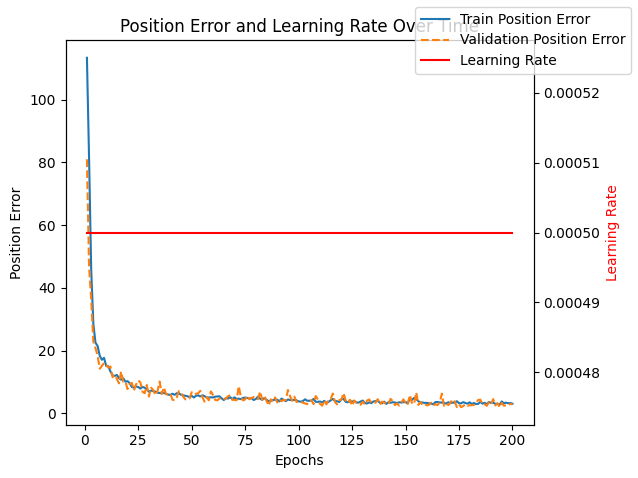

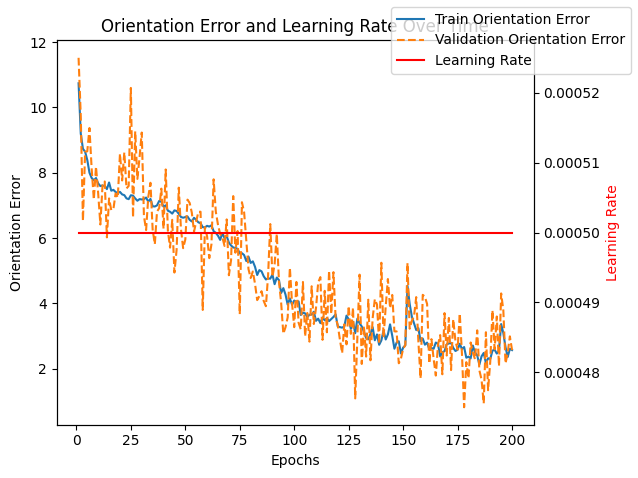

In [ ]:
# 학습이 완료된 후 에러와 학습률을 그래프로 출력

# 위치 에러와 학습률 그래프
fig, ax1 = plt.subplots()

# 위치 에러를 그래프로 표시
ax1.set_title("Position Error and Learning Rate Over Time")
ax1.plot(range(opt.epoch_count, opt.niter + opt.niter_decay + 1), position_errors, label='Train Position Error')
ax1.plot(range(opt.epoch_count, opt.niter + opt.niter_decay + 1), val_position_errors, label='Validation Position Error', linestyle='dashed')
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Position Error")

# 학습률을 두 번째 y축에 표시
ax2 = ax1.twinx()
ax2.plot(range(opt.epoch_count, opt.niter + opt.niter_decay + 1), learning_rates, 'r-', label="Learning Rate")
ax2.set_ylabel("Learning Rate", color='r')

fig.tight_layout()
fig.legend(loc='upper right')
plt.show()

# 자세 에러와 학습률 그래프
fig, ax1 = plt.subplots()

# 자세 에러를 그래프로 표시
ax1.set_title("Orientation Error and Learning Rate Over Time")
ax1.plot(range(opt.epoch_count, opt.niter + opt.niter_decay + 1), orientation_errors, label='Train Orientation Error')
ax1.plot(range(opt.epoch_count, opt.niter + opt.niter_decay + 1), val_orientation_errors, label='Validation Orientation Error', linestyle='dashed')
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Orientation Error")

# 학습률을 두 번째 y축에 표시
ax2 = ax1.twinx()
ax2.plot(range(opt.epoch_count, opt.niter + opt.niter_decay + 1), learning_rates, 'r-', label="Learning Rate")
ax2.set_ylabel("Learning Rate", color='r')

fig.tight_layout()
fig.legend(loc='upper right')
plt.show()

# 3. Test

In [ ]:
import argparse
import os
import torch
import numpy as np
import pandas as pd

class BaseOptions():
    def __init__(self):
        self.parser = argparse.ArgumentParser(formatter_class=argparse.ArgumentDefaultsHelpFormatter)
        self.initialized = False

    def initialize(self):
        self.parser.add_argument('--dataroot', required=True, help='이미지 경로 (trainA, trainB, valA, valB 등의 하위 폴더가 있어야 합니다)')
        self.parser.add_argument('--batchSize', type=int, default=75, help='입력 배치 크기')
        self.parser.add_argument('--loadSize', type=int, default=256, help='이미지를 이 크기로 스케일링')
        self.parser.add_argument('--fineSize', type=int, default=224, help='그 후 이 크기로 자르기')
        self.parser.add_argument('--input_nc', type=int, default=3, help='입력 이미지 채널 수')
        self.parser.add_argument('--output_nc', type=int, default=7, help='출력 이미지 채널 수')
        self.parser.add_argument('--lstm_hidden_size', type=int, default=256, help='PoseLSTM의 LSTM 레이어 숨김 크기')
        self.parser.add_argument('--gpu_ids', type=str, default='0', help='GPU ID: e.g. 0  0,1,2, 0,2. CPU를 사용하려면 -1')
        self.parser.add_argument('--name', type=str, default='experiment_name', help='실험 이름. 샘플 및 모델을 저장할 위치를 결정')
        self.parser.add_argument('--dataset_mode', type=str, default='unaligned_posenet', help='데이터셋 로드 방식을 선택. [unaligned | aligned | single]')
        self.parser.add_argument('--model', type=str, default='posenet', help='사용할 모델을 선택. [posenet | poselstm]')
        self.parser.add_argument('--nThreads', default=8, type=int, help='데이터 로드 스레드 수')
        self.parser.add_argument('--checkpoints_dir', type=str, default='./checkpoints', help='모델이 저장되는 위치')
        self.parser.add_argument('--serial_batches', action='store_true', help='true이면 순서대로 배치 생성, 그렇지 않으면 무작위로 생성')
        self.parser.add_argument('--display_winsize', type=int, default=224, help='디스플레이 창 크기')
        self.parser.add_argument('--display_id', type=int, default=0, help='웹 디스플레이 창 ID')
        self.parser.add_argument('--display_port', type=int, default=8097, help='웹 디스플레이의 visdom 포트')
        self.parser.add_argument('--no_dropout', action='store_true', help='생성기에서 드롭아웃을 사용하지 않음')
        self.parser.add_argument('--max_dataset_size', type=int, default=999999999, help='데이터셋당 허용되는 최대 샘플 수')
        self.parser.add_argument('--resize_or_crop', type=str, default='scale_width_and_crop', help='이미지 로드 시 스케일링 및 크롭 방식 [resize_and_crop|crop|scale_width|scale_width_and_crop]')
        self.parser.add_argument('--no_flip', action='store_true', default=True, help='지정된 경우, 데이터 증강을 위해 이미지를 뒤집지 않음')
        self.parser.add_argument('--seed', type=int, default=0, help='결정적인 결과를 위한 초기 랜덤 시드')
        self.parser.add_argument('--beta', type=float, default=500, help='posenet에서 사용되는 베타 계수')

        self.initialized = True

    def parse(self, args=None):
        if not self.initialized:
            self.initialize()
        self.opt = self.parser.parse_args(args)
        self.opt.isTrain = self.isTrain   # train or test

        str_ids = self.opt.gpu_ids.split(',')
        self.opt.gpu_ids = []
        for str_id in str_ids:
            id = int(str_id)
            if id >= 0:
                self.opt.gpu_ids.append(id)

        # set gpu ids
        if len(self.opt.gpu_ids) > 0:
            torch.cuda.set_device(self.opt.gpu_ids[0])

        args = vars(self.opt)

        print('------------ Options -------------')
        for k, v in sorted(args.items()):
            print('%s: %s' % (str(k), str(v)))
        print('-------------- End ----------------')

        # save to the disk
        expr_dir = os.path.join(self.opt.checkpoints_dir, self.opt.name)
        mkdirs(expr_dir)
        file_name = os.path.join(expr_dir, 'opt_'+self.opt.phase+'.txt')
        with open(file_name, 'wt') as opt_file:
            opt_file.write('------------ Options -------------\n')
            for k, v in sorted(args.items()):
                opt_file.write('%s: %s\n' % (str(k), str(v)))
            opt_file.write('-------------- End ----------------\n')
        return self.opt

# Define the TrainOptions class
class TrainOptions(BaseOptions):
    def initialize(self):
        BaseOptions.initialize(self)
        self.parser.add_argument('--display_freq', type=int, default=100, help='frequency of showing training results on screen')
        self.parser.add_argument('--display_single_pane_ncols', type=int, default=0, help='if positive, display all images in a single visdom web panel with certain number of images per row.')
        self.parser.add_argument('--update_html_freq', type=int, default=1000, help='frequency of saving training results to html')
        self.parser.add_argument('--print_freq', type=int, default=100, help='frequency of showing training results on console')
        self.parser.add_argument('--save_latest_freq', type=int, default=5000, help='frequency of saving the latest results')
        self.parser.add_argument('--save_epoch_freq', type=int, default=10, help='frequency of saving checkpoints at the end of epochs')
        self.parser.add_argument('--continue_train', action='store_true', help='continue training: load the latest model')
        self.parser.add_argument('--epoch_count', type=int, default=1, help='the starting epoch count, we save the model by <epoch_count>, <epoch_count>+<save_latest_freq>, ...')
        self.parser.add_argument('--phase', type=str, default='train', help='train, val, test, etc')
        self.parser.add_argument('--which_epoch', type=str, default='latest', help='which epoch to load? set to latest to use latest cached model')
        self.parser.add_argument('--niter', type=int, default=500, help='# of iter at starting learning rate')
        self.parser.add_argument('--niter_decay', type=int, default=0, help='# of iter to linearly decay learning rate to zero')
        self.parser.add_argument('--adambeta1', type=float, default=0.9, help='first momentum term of adam')
        self.parser.add_argument('--adambeta2', type=float, default=0.999, help='second momentum term of adam')
        self.parser.add_argument('--lr', type=float, default=0.0005, help='initial learning rate for adam')
        self.parser.add_argument('--pool_size', type=int, default=50, help='the size of image buffer that stores previously generated images')
        self.parser.add_argument('--use_html', action='store_true', help='save intermediate training results to [opt.checkpoints_dir]/[opt.name]/web/')
        self.parser.add_argument('--lr_policy', type=str, default='lambda', help='learning rate policy: lambda|step|plateau')
        self.parser.add_argument('--lr_decay_iters', type=int, default=50, help='multiply by a gamma every lr_decay_iters iterations')
        self.parser.add_argument('--init_weights', type=str, default='/content/drive/MyDrive/딥러닝/PoseNet/places-googlenet.pickle', help='initiliaze network from, e.g., /content/drive/MyDrive/딥러닝/PoseNet/places-googlenet.pickle')

        self.isTrain = True

# 테스트 옵션 정의
class TestOptions(BaseOptions):
    def initialize(self):
        BaseOptions.initialize(self)
        self.parser.add_argument('--results_dir', type=str, default='/content/drive/MyDrive/team1/PoseNetresnet_epoch100/results/', help='saves results here.')
        self.parser.add_argument('--aspect_ratio', type=float, default=1.0, help='aspect ratio of result images')
        self.parser.add_argument('--phase', type=str, default='test', help='train, val, test, etc')
        self.parser.add_argument('--eval', action='store_true', help='use eval mode during test time.')
        self.parser.add_argument('--which_epoch', type=str, default='latest', help='which epoch to load? set to latest to use latest cached model')

        self.isTrain = False

# 테스트 코드 실행
test_opt = TestOptions().parse(args=[
    '--dataroot', '/content/drive/MyDrive/team1/datasets_test/Renaissance4F',
    '--batchSize', '1',
    '--loadSize', '256',
    '--fineSize', '224',
    '--input_nc', '3',
    '--output_nc', '7',
    '--lstm_hidden_size', '256',
    '--gpu_ids', '0',
    '--name', '/content/drive/MyDrive/team1/PoseNetresnet_final/Renaissance4F/PoseNetresnet_epoch100',
    '--dataset_mode', 'unaligned_posenet',
    '--model', 'posenet',
    '--nThreads', '1',
    '--checkpoints_dir', '/content/drive/MyDrive/team1/PoseNetresnet_final/beta100',
    '--display_winsize', '224',
    '--display_port', '8097',
    '--max_dataset_size', '999999999',
    '--resize_or_crop', 'scale_width_and_crop',
    '--seed', '0',
    '--beta', '50',
    '--results_dir', '/content/drive/MyDrive/team1/PoseNetresnet_final/results/',
    '--aspect_ratio', '1.0',
    '--phase', 'test',
    '--which_epoch', 'latest'
])

def get_current_errors():
        if test_opt.isTrain:
            return OrderedDict([('pos_err', loss_pos),
                                ('ori_err', loss_ori),
                                ])

        pos_err = torch.dist(pred_B[0], input_B[:, 0:3])
        ori_gt = F.normalize(input_B[:, 3:], p=2, dim=1)
        abs_distance = torch.abs((ori_gt.mul(pred_B[1])).sum())
        ori_err = 2*180/numpy.pi* torch.acos(abs_distance)
        return [pos_err.item(), ori_err.item()]



test_opt.nThreads = 1   # test code only supports nThreads = 1
test_opt.batchSize = 1  # test code only supports batchSize = 1
test_opt.serial_batches = True  # no shuffle
test_opt.no_flip = True  # no flip


------------ Options -------------
aspect_ratio: 1.0
batchSize: 1
beta: 50.0
checkpoints_dir: /content/drive/MyDrive/team1/PoseNetresnet_final/beta100
dataroot: /content/drive/MyDrive/team1/datasets_test/Renaissance4F
dataset_mode: unaligned_posenet
display_id: 0
display_port: 8097
display_winsize: 224
eval: False
fineSize: 224
gpu_ids: [0]
input_nc: 3
isTrain: False
loadSize: 256
lstm_hidden_size: 256
max_dataset_size: 999999999
model: posenet
nThreads: 1
name: /content/drive/MyDrive/team1/PoseNetresnet_final/Renaissance4F/PoseNetresnet_epoch100
no_dropout: False
no_flip: True
output_nc: 7
phase: test
resize_or_crop: scale_width_and_crop
results_dir: /content/drive/MyDrive/team1/PoseNetresnet_final/results/
seed: 0
serial_batches: False
which_epoch: latest
-------------- End ----------------


In [ ]:
gpu_ids= [0]
isTrain = opt.isTrain

use_gpu = len(gpu_ids) > 0
if use_gpu:
        assert(torch.cuda.is_available())

resnet_netG = ResNetPoseNet( isTest=not isTrain, gpu_ids=gpu_ids)

if len(gpu_ids) > 0:
        resnet_netG.cuda(gpu_ids[0])

googlenet_weights = None
Tensor = torch.cuda.FloatTensor if gpu_ids else torch.Tensor
save_dir = os.path.join(opt.checkpoints_dir, opt.name)


if not isTrain or opt.continue_train:
    resnet_netG.load_state_dict(torch.load('/content/drive/MyDrive/team1/PoseNetresnet_final/beta100/200_net_latest.pth'))
if isTrain:
    old_lr = opt.lr
    # define loss functions
    criterion = torch.nn.MSELoss()

    # initialize optimizers
    schedulers = []
    optimizers = []
    optimizer_G = torch.optim.Adam(resnet_netG.parameters(),lr=opt.lr, eps=1,weight_decay=0.0625,betas=(opt.adambeta1, opt.adambeta2))
    optimizers.append(optimizer_G)


visualizer = Visualizer(opt)

### 테스트 코드 다시

In [ ]:

test_data_loader = CreateDataLoader(test_opt)
test_dataset = test_data_loader.dataset  # 실제 데이터셋 객체를 가져옴
test_dataset_size = len(test_dataset)
print('#ttotal images = %d' % test_dataset_size)
test_loader = DataLoader(test_dataset, batch_size=test_opt.batchSize, shuffle=True, num_workers=test_opt.nThreads)


CustomDatasetDataLoader
dataset [UnalignedPoseNetDataset] was created
#ttotal images = 946


In [ ]:

finalresnetinfer = ResNetPoseNet( isTest=not isTrain, gpu_ids=gpu_ids)
save_filename = '%s_net_%s.pth' % (200,'latest')
save_path = os.path.join('/content/drive/MyDrive/team1/PoseNetresnet_final/beta100', save_filename)

finalresnetinfer.load_state_dict(torch.load(save_path))

input_A = data['A']
input_B = data['B']
image_paths = data['A_paths']
input_A.resize_(input_A.size()).copy_(input_A)
input_B.resize_(input_B.size()).copy_(input_B)
finalresnetinfer = finalresnetinfer.cuda()
input_A = input_A.float().cuda()
input_B = input_B.float().cuda()
pred_B = finalresnetinfer(input_A)
pose = numpy.concatenate((pred_B[0].data[0].cpu().numpy(),pred_B[1].data[0].cpu().numpy()))

In [ ]:
test_result = []
origin = [ ]
image_path_list = []
finalresnetinfer = ResNetPoseNet( isTest=not isTrain, gpu_ids=gpu_ids)
save_filename = '%s_net_%s.pth' % (200,'latest')
save_path = os.path.join('/content/drive/MyDrive/team1/PoseNetresnet_final/beta100', save_filename)

finalresnetinfer.load_state_dict(torch.load(save_path))

err = []
epoch_result = []
epoch_origin = []
for i, data in enumerate(test_loader):
    input_A = data['A']
    input_B = data['B']
    image_paths = data['A_paths']
    image_path_list.append(image_paths)
    input_A.resize_(input_A.size()).copy_(input_A)
    input_B.resize_(input_B.size()).copy_(input_B)
    input_A = input_A.float().cuda()
    input_B = input_B.float().cuda()
    finalresnetinfer=finalresnetinfer.cuda()
    pred_B = finalresnetinfer(input_A)
    pose = numpy.concatenate((pred_B[0].data[0].cpu().numpy(),
    pred_B[1].data[0].cpu().numpy()))

    epoch_origin.append(data['B'][0].numpy())
    epoch_result.append(list(pose))

    err_p, err_o = get_current_errors()
    err.append([err_p, err_o])

    x, y, z, w, p, q, r = pose
    test_result.append([x, y, z, w, p, q, r])
    #print(f"\tPredicted pose - x: {x:.2f}, y: {y:.2f}, z: {z:.2f}, w: {w:.2f}, p: {p:.2f}, q: {q:.2f}, r: {r:.2f}")

    median_pos = numpy.median(err, axis=0)
#print("\tmedian wrt pos.: {0:.2f}m {1:.2f}°".format(median_pos[0], median_pos[1]))




In [ ]:
pred_df = pd.DataFrame(epoch_result, columns=['x', 'y', 'z', 'p', 'q', 'r', 's'])
origin_df = pd.DataFrame(epoch_origin, columns=['x', 'y', 'z', 'p', 'q', 'r', 's'])
image_df = pd.DataFrame(image_path_list,columns=['image_path'])

In [ ]:
pred_df.to_csv('/content/drive/MyDrive/team1/epoch200model_pred_df.csv')
origin_df.to_csv('/content/drive/MyDrive/team1/epoch200model_origin_df.csv')
image_df.to_csv('/content/drive/MyDrive/team1/epoch200model_image_df.csv')

# 4. 결과 확인

In [ ]:
import torch

def quaternion_to_euler_angle(quat):
    """
    Convert quaternion (w, x, y, z) to euler angles (roll, pitch, yaw).
    """
    w, x, y, z = quat[:, 0], quat[:, 1], quat[:, 2], quat[:, 3]

    t0 = +2.0 * (w * x + y * z)
    t1 = +1.0 - 2.0 * (x * x + y * y)
    roll_x = np.arctan2(t0, t1)

    t2 = +2.0 * (w * y - z * x)
    t2 = np.clip(t2, -1.0, 1.0)
    pitch_y = np.arcsin(t2)

    t3 = +2.0 * (w * z + x * y)
    t4 = +1.0 - 2.0 * (y * y + z * z)
    yaw_z = np.arctan2(t3, t4)

    return np.stack((roll_x, pitch_y, yaw_z), axis=1)

# 위치 오차 계산 함수 정의
def compute_position_error(predicted, target):
    return torch.sqrt(torch.sum((predicted - target) ** 2, dim=1))

# 회전 오차 계산 함수 정의
def compute_orientation_error(predicted, target):
    predicted_euler = quaternion_to_euler_angle(predicted.detach().cpu().numpy())
    target_euler = quaternion_to_euler_angle(target.detach().cpu().numpy())
    return torch.tensor(np.abs(predicted_euler - target_euler).mean(axis=1))


# numpy 배열을 torch tensor로 변환
test_tensor = torch.tensor(origin_df.values)
predict_tensor = torch.tensor(pred_df.values)

# 위치 오차 계산
pos_error = compute_position_error(predict_tensor[:, :3], test_tensor[:, :3])
print(f"Position Error: \n{pos_error.mean().item()}\n")

# 회전 오차 계산
rot_error = compute_orientation_error(predict_tensor[:, 3:], test_tensor[:, 3:])
print(f"Rotation Error: \n{rot_error.mean().item()}\n")

# MSE 계산
mse_error = torch.mean((predict_tensor - test_tensor) ** 2, dim=0)
print(f"Mean Squared Error: \n{mse_error}\n")

Position Error: 
12.368333967475404

Rotation Error: 
1.9953209236229885

Mean Squared Error: 
tensor([4.7649e+01, 1.9237e+02, 1.7833e+00, 1.8472e-01, 3.1067e-01, 2.2707e-01,
        3.3284e-01], dtype=torch.float64)



x

In [ ]:
mse_error[0]

tensor(47.6491, dtype=torch.float64)

y

In [ ]:
mse_error[1]

tensor(192.3687, dtype=torch.float64)

z

In [ ]:
mse_error[2]

tensor(1.7833, dtype=torch.float64)

p

In [ ]:
mse_error[3]

tensor(0.1847, dtype=torch.float64)

q

In [ ]:
mse_error[4]

tensor(0.3107, dtype=torch.float64)

r

In [ ]:
mse_error[5]

tensor(0.2271, dtype=torch.float64)

s

In [ ]:
mse_error[6]

tensor(0.3328, dtype=torch.float64)